In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from dataset import  suny_international

df=suny_international()['ghi']
X=np.array(df.index.minute+df.index.hour*60).reshape(-1,1)
y=np.array(df)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

def baseline_model():
    regressor = Sequential()
    regressor.add(Dense(units=20, activation='relu', input_dim=1)) 
    regressor.add(Dense(units=20, activation='relu')) 
    regressor.add(Dense(units=20, activation='relu')) 
    regressor.add(Dense(units=1))
    regressor.compile(loss='mean_squared_error', optimizer='adam')
    return regressor

model = baseline_model()
model.fit(X,y,epochs=100)
y_pred = model.predict(X)
model.save('models/simple_dnn.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
30681/30681 [==============================] - 5s 147us/step - loss: 142141.7530
Epoch 2/100
30681/30681 [==============================] - 3s 101us/step - loss: 134592.1799
Epoch 3/100
30681/30681 [==============================] - 3s 103us/step - loss: 134281.2090
Epoch 4/100
30681/30681 [==============================] - 3s 112us/step - loss: 133844.0156
Epoch 5/100
30681/30681 [==============================] - 4s 115us/step - loss: 133270.1816
Epoch 6/100
30681/30681 [==============================] - 4s 119us/step - loss: 132597.2363
Epoch 7/100
30681/30681 [==============================] - 4s 115us/step - loss: 131234.2876
Epoch 8/100
 1920/30681 [>.............................] - ETA: 4s - loss: 127969.7483

KeyboardInterrupt: 

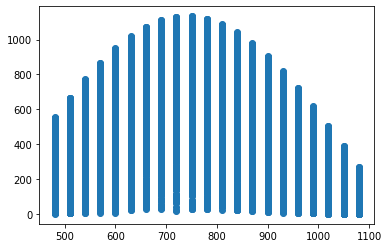

In [69]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X.reshape(-1),y)
plt.figure()
plt.scatter(X.reshape(-1),y_pred)

In [ ]:
from animate import plot_daily
import pandas as pd 
plot_daily(df,pd.Series(y_pred,index=df.index) )